## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [34]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
office_df = pd.read_csv('datasets/office_episodes.csv')
office_df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [36]:
# Check for null values
office_df.isna().sum()

episode_number      0
season              0
episode_title       0
description         0
ratings             0
votes               0
viewership_mil      0
duration            0
release_date        0
guest_stars       159
director            0
writers             0
has_guests          0
scaled_ratings      0
dtype: int64

In [37]:
# Rows, Columns
office_df.shape

(188, 14)

# Question 1
## Create a matplotlib scatter plot of the data that contains the following attributes:

1. Each episode's episode number plotted along the x-axis
2. Each episode's viewership (in millions) plotted along the y-axis
3. A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
    - Ratings < 0.25 are colored "red"
    - Ratings >= 0.25 and < 0.50 are colored "orange"
    - Ratings >= 0.50 and < 0.75 are colored "lightgreen"
    - Ratings >= 0.75 are colored "darkgreen"
4. A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
5. A title, reading "Popularity, Quality, and Guest Appearances on the Office"
6. An x-axis label reading "Episode Number"
7. A y-axis label reading "Viewership (Millions)"

In [38]:
# Adding color scheme
colors = []
for index, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

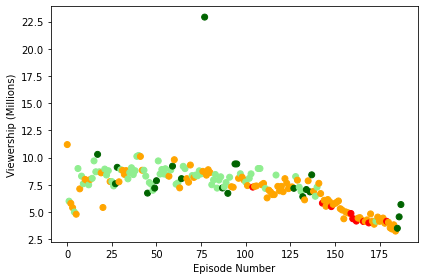

In [39]:
fig, ax = plt.subplots()
ax.scatter(x=office_df['episode_number'], y=office_df['viewership_mil'], c=colors)
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
plt.show()

In [40]:
# Adding sizing system
sizes = []
markers = []

for index, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

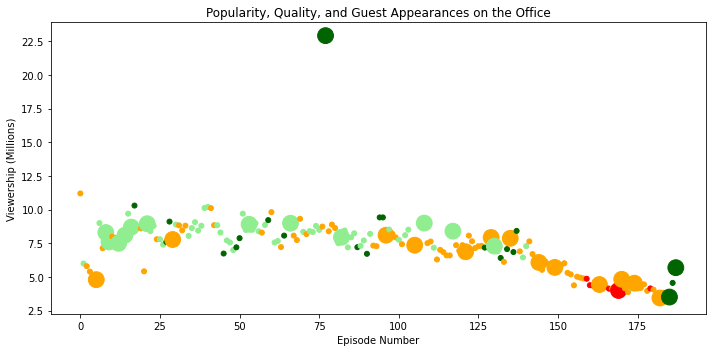

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(x=office_df['episode_number'], y=office_df['viewership_mil'], c=colors, s=sizes)
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

# Question 2
## Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. 
1. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [42]:
# Find the most watched Office episode
most_watched_df = office_df.sort_values(by='viewership_mil', ascending=False, ignore_index=True)
print(most_watched_df)

     episode_number  season       episode_title  \
0                77       5       Stress Relief   
1                 0       1               Pilot   
2                17       2          The Injury   
3                40       3          The Return   
4                39       3  Traveling Salesmen   
..              ...     ...                 ...   
183             183       9       Stairmageddon   
184             181       9            The Farm   
185             185       9    Livin' the Dream   
186             182       9              Promos   
187             184       9      Paper Airplane   

                                           description  ratings  votes  \
0    Dwight's too-realistic fire alarm gives Stanle...      9.7   8170   
1    The premiere episode introduces the boss and s...      7.5   4936   
2    Michael's "injury" from a George Foreman Grill...      9.1   4314   
3    Andy does the impossible--he makes everyone in...      8.8   3211   
4    Dwight does 

In [43]:
# Save the top stars
top_star = 'Jack Black'
print(top_star)

Jack Black


# Bonus Step
## Differentiate guest appearances not just with size, but also with a star!

In [44]:
# Add colors and sizes to dataframe
office_df['colors'] = colors
office_df['sizes'] = sizes
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
 14  colors          188 non-null    object 
 15  sizes           188 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(7)
memory usage: 22.3+ KB


In [45]:
# Create non_guest_df and guest_df
non_guest_df = office_df[office_df['has_guests']==False]
guest_df = office_df[office_df['has_guests']==True]

In [46]:
guest_df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,0.34375,orange,250
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,0.56250,lightgreen,250
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,0.56250,lightgreen,250
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,2005-11-08,Tim Meadows,Greg Daniels,Paul Lieberstein,True,0.62500,lightgreen,250
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,2005-11-22,Ken Jeong,Paul Feig,Jennifer Celotta,True,0.56250,lightgreen,250


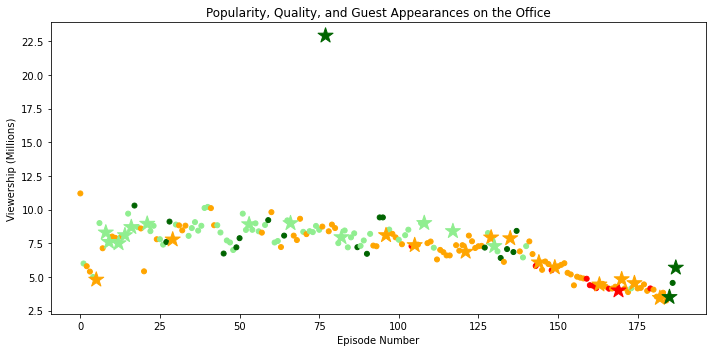

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(x=non_guest_df['episode_number'], y=non_guest_df['viewership_mil'], c=non_guest_df['colors'], s=non_guest_df['sizes']) # without guest
ax.scatter(x=guest_df['episode_number'], y=guest_df['viewership_mil'], c=guest_df['colors'], s=guest_df['sizes'], marker='*') # with guest
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [48]:
%%nose
import pandas as pd
import numpy as np

color_data = np.genfromtxt('datasets/color_data.csv', delimiter=',')
bonus_color_data = np.genfromtxt('datasets/bonus_color_data.csv', delimiter=',')
bonus_color_data_2 = np.genfromtxt('datasets/bonus_color_data_2.csv', delimiter=',')
solution_data = pd.read_csv('datasets/solution_data.csv')

x_axis_data = solution_data['x_axis'].values
y_axis_data = solution_data['y_axis'].values
size_data = solution_data['sizes'].values


# Try to retrieve student plot data, if it's been specified, otherwise set test values to null
try:
    # Generate x and y axis containers
    stu_yaxis_cont = []
    stu_xaxis_cont = []
    stu_sizes_cont = []
    stu_colors_cont = []

    # Loop through every axis in student's figure and grab x and y data
    for col in fig.gca().collections:
        stu_yaxis_cont.append(col._offsets.data[:,1])
        stu_xaxis_cont.append(col._offsets.data[:,0])
        stu_sizes_cont.append(np.full((1, len(col._offsets.data[:,0])), col._sizes)[0])
        stu_colors_cont.append(col._facecolors)

    # Get figure labels
    title = fig.gca()._axes.get_title()
    x_label = fig.gca()._axes.get_xlabel()
    y_label = fig.gca()._axes.get_ylabel()

    # Concatenate lists to compare to test plot
    stu_yaxis = np.concatenate(stu_yaxis_cont)
    stu_xaxis = np.concatenate(stu_xaxis_cont)
    stu_sizes = np.concatenate(stu_sizes_cont)
    stu_colors = np.concatenate(stu_colors_cont)
except:
    title = 'null'
    x_label = 'null'
    y_label = 'null'
    stu_yaxis = 'null'
    stu_xaxis = 'null'
    stu_sizes = [0, 1]
    stu_colors = [0, 1]

# Tests
def test_fig_exists():
    import matplotlib
    # Extra function to test for existence of fig to allow custom feedback
    def test_fig():
        try:
            fig
            return True
        except:
            return False
    assert (test_fig() == True), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'
    assert (type(fig) == matplotlib.figure.Figure), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'

def test_y_axis():
    assert (sorted(stu_yaxis) == y_axis_data).all(), \
    'Are you correctly plotting viwership in millions on the y axis? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    
def test_x_axis():
    assert (sorted(stu_xaxis) == x_axis_data).all(), \
    'Are you correctly plotting episode number on the x axis? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    
def test_colors():
    assert (len(stu_colors) == len(color_data)), \
    'Are you correctly setting the colors according to the rating scheme provided? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    assert (np.sort(color_data) == np.sort(stu_colors)).all() or \
    (np.sort(bonus_color_data) == np.sort(stu_colors)).all() or \
    (np.sort(bonus_color_data_2) == np.sort(stu_colors)).all(), \
    'Are you correctly setting the colors according to the rating scheme provided? Make sure you are calling your plot in the same cell that you initialize `fig`!'

def test_size():
    assert (len(stu_sizes) == len(size_data)), \
    'Are you correctly plotting all points as size 25, except for guest-star episodes which are sized at 250? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    assert all(size_data == np.sort(stu_sizes)), \
    'Are you correctly plotting all points as size 25, except for guest-star episodes which are sized at 250? Make sure you are calling your plot in the same cell that you initialize `fig`!'

def test_labels():
    assert (title.lower() == ('Popularity, Quality, and Guest Appearances on the Office').lower()), \
    'Did you set the correct title? Make sure you are specifying your plot in the same cell that you initialize `fig`!'
    assert (x_label.lower() == ('Episode Number').lower()), \
    'Did you set the correct x label? Make sure you are specifying your plot in the same cell that you initialize `fig`!'
    assert (y_label.lower() == ('Viewership (Millions)').lower()), \
    'Did you set the correct x label? Make sure you are specifying your plot in the same cell that you initialize `fig`!' 

def test_stars():
    assert (top_star == 'Cloris Leachman' or top_star == 'Jack Black' or top_star == 'Jessica Alba'), \
    "Are you correctly assigning one of the guest stars of the most popular episode to `top_star`?"

7/7 tests passed
